In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('~/data science erc workshop/data/multiple linear regression/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
corr_prof = df.corr()

In [8]:
corr_prof

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
sns.heatmap(corr_prof)

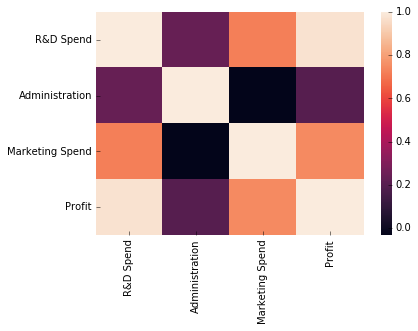

In [10]:
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/home/hacked/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X = df[list(df.columns)[:3]]
y = df['Profit']

In [22]:
X.shape

(50, 3)

In [23]:
y.shape

(50,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
regressor = LinearRegression()

In [26]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predicted = regressor.predict(X_test)

In [28]:
output_compare = dict(zip(y_test, predicted))

In [29]:
output_compare

{35673.41: 51085.807469279855,
 65200.33: 64570.827389151484,
 71498.49: 71127.04315910736,
 77798.83: 75473.9507718253,
 81229.06: 70577.81442290131,
 97483.56: 97639.80057050636,
 99937.59: 100097.63444801117,
 110352.25: 114276.14420815863,
 124266.9: 128895.44911737085,
 146121.95: 135834.78316583703,
 152211.77: 151065.38370048825,
 156991.12: 163655.2817616035,
 191792.06: 188055.56325074873}

In [31]:
print ('The value of r-squared score: {}'.format(regressor.score(X_test,y_test)))

The value of r-squared score: 0.9759907501344595
